In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model

In [0]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape=(len(x),), stddev=0.01)
  y = m * x + b + noise
  return x, y

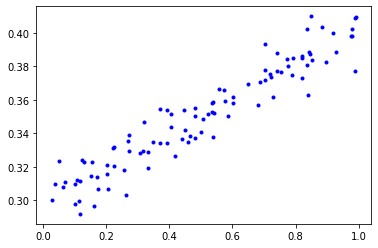

In [6]:
x_train, y_train = make_noisy_data()
plt.plot(x_train, y_train, 'b.')

In [0]:
m = tf.Variable(0.)
b = tf.Variable(0.)

In [0]:
def predict(x):
  y = m * x + b
  return y

In [0]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [10]:
loss = squared_error(predict(x_train), y_train)
print("Starting Loss ", loss.numpy())

Starting Loss  0.12391802


### Gradient Descent from Scratch

In [12]:
learning_rate = 0.05
steps = 200

for i in range(steps):
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
  
  gradients = tape.gradient(loss, [m, b])

  # Step in negative gradient multiplied by learning rate
  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)

  if i % 20 == 0:
    print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.123918
Step 20, Loss 0.000752
Step 40, Loss 0.000186
Step 60, Loss 0.000163
Step 80, Loss 0.000147
Step 100, Loss 0.000135
Step 120, Loss 0.000126
Step 140, Loss 0.000118
Step 160, Loss 0.000112
Step 180, Loss 0.000108


In [13]:
print("m:%f, b: %f" % (m.numpy(), b.numpy()))

m:0.116532, b: 0.291695


### Best Fit Line Plot

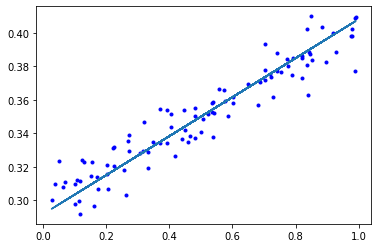

In [15]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, predict(x_train))

### Gradient Descent in 3D

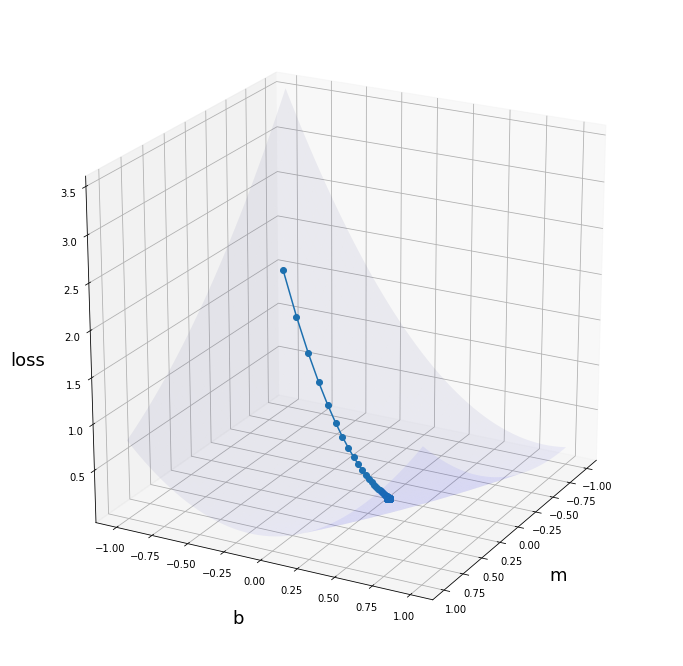

In [26]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
m_mesh, b_mesh = np.meshgrid(ms, bs)

def loss_for_values(m, b):
  y = m * x_train + b
  loss = squared_error(y, y_train)
  return loss

zs = np.array([loss_for_values(m, b) for (m, b) in zip(np.ravel(m_mesh), np.ravel(b_mesh))])

z_mesh = zs.reshape(m_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

m = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
  
  gradients = tape.gradient(loss, [m, b])
  history.append((m.numpy(), b.numpy(), loss.numpy()))
  # Step in negative gradient multiplied by learning rate
  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)

ax.plot([h[0] for h in history],
        [h[1] for h in history],
        [h[2] for h in history],
        marker='o')
ax.set_xlabel('m', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=28)